# Markovian probabilities vs intersection size

## Compute intersection size

In [7]:
import model
import sequence_processor as seq_proc

import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 15
seq_file = "sequences/seq_default_combined.txt"

# Initialize the model
rec_model = model.RecallModel()
# Generate eta matrix with a fixed seed
rec_model.init(seed = 0)

P = model.NUM_MEMORIES
ixn_count = np.zeros((P, P))

for mu1 in range(P):
  for mu2 in range(P):
    # Intersection by just multiplying two binary vecs
    ixn_count[mu1, mu2] = sum(rec_model.memory_pattern[:,mu1] * rec_model.memory_pattern[:,mu2])

## Plot intersection size distribution

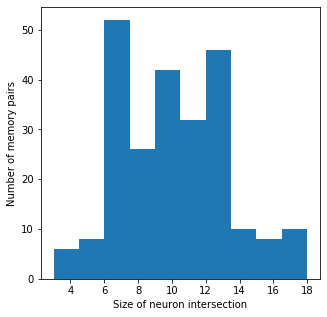

In [2]:
ixn_count_flat = ixn_count.flatten()
# Ignore the self-intersections
non_diags = ixn_count_flat[ixn_count_flat < max(ixn_count_flat)/2]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(non_diags)
ax.set_xlabel("Size of neuron intersection")
ax.set_ylabel("Number of memory pairs")
_ = _

## Compute intersection ranks

In [3]:
ixn_ranks = np.zeros((P, P), dtype=int)

# ixn_ranks[i][j] = Consider memory i. Among all the memories, rank them by intersection size.
# Highest value = 15 means memory i's best intersecting match is that memory.
for mu1 in range(P):
  ixn_counts_for_mem = ixn_count[mu1,:]
  idcs = np.argsort(ixn_counts_for_mem)
  for rank in range(len(idcs)):
    mem_with_this_rank = idcs[rank]
    ixn_ranks[mu1][mem_with_this_rank] = rank

## Compute average markovian transition probability per intersection rank

In [4]:
total_trans_prob_per_rank = np.zeros(P)
cnt_trans_prob_per_rank = np.zeros(P)

seqs = seq_proc.read_sequence_file(seq_file)
markov_table = seq_proc.compute_n_order_markov(n=1, seqs=seqs)
for mu1 in range(P):
  for mu2 in range(P):
    rank = ixn_ranks[mu1,mu2]
    total_trans_prob_per_rank[rank] += markov_table[(mu1,)][mu2]
    cnt_trans_prob_per_rank[rank] += 1
avg_trans_prob_per_rank = total_trans_prob_per_rank / cnt_trans_prob_per_rank;

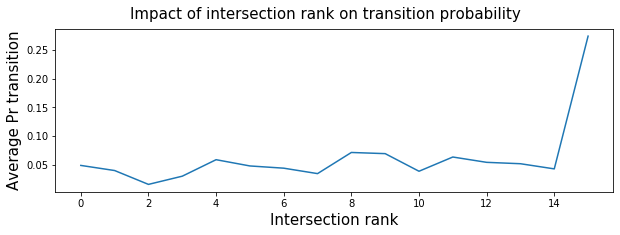

In [11]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(range(0,P), avg_trans_prob_per_rank)
ax.set_xlabel("Intersection rank", fontsize=FONTSIZE)
ax.set_ylabel("Average Pr transition", fontsize=FONTSIZE)
fig.suptitle("Impact of intersection rank on transition probability", fontsize=FONTSIZE)
_ = _